Week 3, Assignment C1:

OLS Linear Regression in Python

In this notebook, we will perform an OLS linear regression in Python.
Please complete the lines bellow where you see "# TODO".

In [11]:
#Objective 1.
#Use this cell to import all three of the Pandas (as pd), Numpy (as np), and Pyplot (from Matplotlib as plt) 
#packages.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
np.random.seed(0) # same to 
x1 = 3.0 * np.random.randn(100) + 2.0
x2 = 3.5 * np.random.randn(100) + 1.0
res = 0.5 * np.random.randn(100) # e
y = 1.5 + 0.45 * x1 + res

#Objective 2.
#Create a Pandas DataFrame to store the values of x and y generated by the commands appearing above, and examine
#the first five rows of the DataFrame.

df = pd.DataFrame({'x1': x1,'x2':x2, 'y': y})
df.head()

,x1,x2,y
0,7.292157,7.591027,4.596880
1,3.200472,-3.717157,2.820523
2,4.936214,-3.446697,4.271126
3,8.722680,4.392888,5.752838
4,7.602674,-3.105932,5.241269


In [13]:
#Objective 3.
#Calculate the means of both x and y, and print them as output.

x1_bar = np.mean(x1)
x2_bar = np.mean(x2)
y_bar = np.mean(y)
print(x1_bar)
print(x2_bar)
print(y_bar)

2.179424046603455
1.2870453976174305
2.451124690691723


In [14]:
#Objective 4.
#Add a column called 'x_var' to the DataFrame.  Populate this column with the squares of the deviations of the
#x values from their mean (x_bar).

df['x1_var'] = (x1 -x1_bar )**2
df['x2_var'] = (x2 -x2_bar )**2



In [15]:
#Objective 5.
#Add a column called 'xy_cov' to the DataFrame.  Populate this column with the products of the deviations of the
#x values from their mean (x_bar) and the deviations of the y values from their mean (y_bar):
#(x - x_bar)(y - y_bar).

df['x1y_cov'] = (x1 - x1_bar) * (y - y_bar)
df['x2y_cov'] = (x2 - x2_bar) * (y - y_bar)
df

,x1,x2,y,x1_var,x2_var,x1y_cov,x2y_cov
0,7.292157,7.591027,4.596880,26.140039,39.740190,10.970673,13.526801
1,3.200472,-3.717157,2.820523,1.042538,25.042039,0.377173,-1.848542
2,4.936214,-3.446697,4.271126,7.599891,22.408322,5.017361,-8.615419
3,8.722680,4.392888,5.752838,42.814193,9.646261,21.603952,10.254602
4,7.602674,-3.105932,5.241269,29.411640,19.298250,15.131650,-12.257041
...,...,...,...,...,...,...,...
95,4.119720,0.399588,3.922319,3.764746,0.787581,2.854553,-1.305623
96,2.031500,3.701267,2.463038,0.021882,5.828466,-0.001762,0.028760
97,7.357611,3.882265,5.102402,26.813625,6.735162,13.728811,6.880646
98,2.380736,8.571326,2.371607,0.040527,53.060741,-0.016008,-0.579231


In [16]:
#Objective 6.
#Use the values currently stored in the DataFrame to calculate the OLS Linear Regression coefficients
# We want to take the sum of our collumn 'xy_cov' and divide it by the sum of 'x_var'
#alpha and beta, and print them as output.

beta1 = df['x1y_cov'].sum() / df['x1_var'].sum()
beta2 = df['x2y_cov'].sum() / df['x2_var'].sum()
alpha = (y_bar - beta1 * x1_bar)-(y_bar - beta2 * x2_bar)
print(alpha)
print(beta1)
print(beta2)

-0.9433464003242489
0.4619826474139432
0.049345338308029396


In [17]:
#Objective 7.
#Make a new vector of values called y_pred containing a predicted y value for each actual y value in the DataFrame.
# y_pred = a + BX

y_pred = alpha + (beta1 * x1)+(beta2 * x2)


In [18]:
#Objective 8.
#Plot the predicted values of y (y_pred) against the actual values of y.  Make the actual values of y red in color.

#plt.plot(x1,x2, y_pred)
#plt.scatter(x1,x2, y, color='r')
#plt.show()


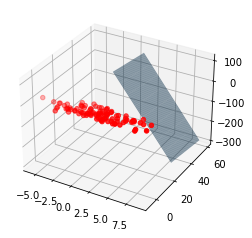

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['y'], c = 'r', marker = 'o')
xx1, xx2 = np.meshgrid(range(1, 10), range(25, 60))
yy = -45.25*xx1 - 0.886*xx2 + 169.23
ax.plot_surface(xx1, xx2, yy, alpha=0.5)
plt.show()